## EDA on Car Dataset

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the dataset

In [342]:
data=pd.read_csv("29588446-1.04.Real-life-example.csv")
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [343]:
data.describe(include="all") ##Describe for categorical value

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [344]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [345]:
data_no_mv=data.dropna(axis=0)
data_no_mv.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [346]:
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [347]:
data_no_mv.max()

Brand           Volkswagen
Price             300000.0
Body                   van
Mileage                980
EngineV              99.99
Engine Type         Petrol
Registration           yes
Year                  2016
Model                   Z4
dtype: object

In [348]:
data_no_mv.nunique()

Brand             7
Price           892
Body              6
Mileage         407
EngineV          72
Engine Type       4
Registration      2
Year             39
Model           306
dtype: int64

We dont need model because it has many unique categorical values

In [349]:
data_no_mv=data_no_mv.drop(["Model"],axis=1)

## Brand Analysis

<AxesSubplot:xlabel='count', ylabel='Brand'>

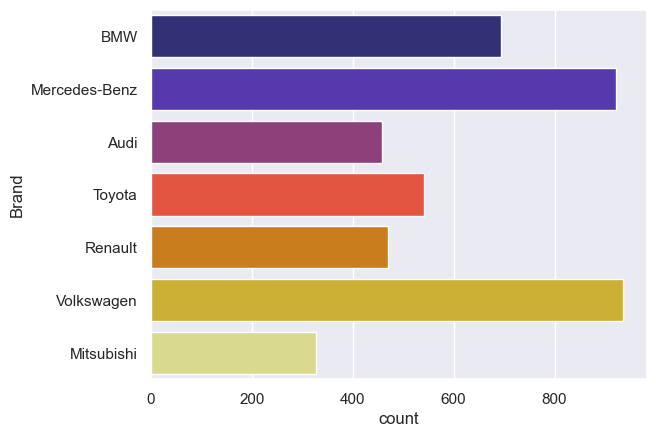

In [350]:
sns.countplot(data=data_no_mv,y=data["Brand"],palette="CMRmap")

## Exploring PDFs

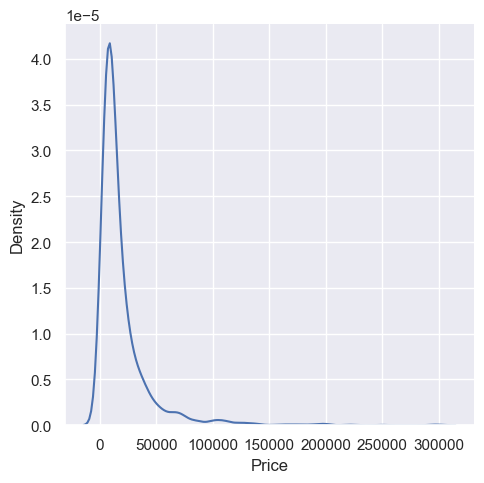

In [351]:
sns.displot(data_no_mv["Price"],kind="kde")

Here we have outliers
so we can remove top 1% of the observation
We can use quantile method

## Removing outliers

In [352]:
q=data_no_mv["Price"].quantile(0.99)
q

129812.51999999981

In [353]:
data_1=data_no_mv[data_no_mv["Price"]<q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [354]:
data_1.max()

Brand           Volkswagen
Price             129222.0
Body                   van
Mileage                980
EngineV              99.99
Engine Type         Petrol
Registration           yes
Year                  2016
dtype: object

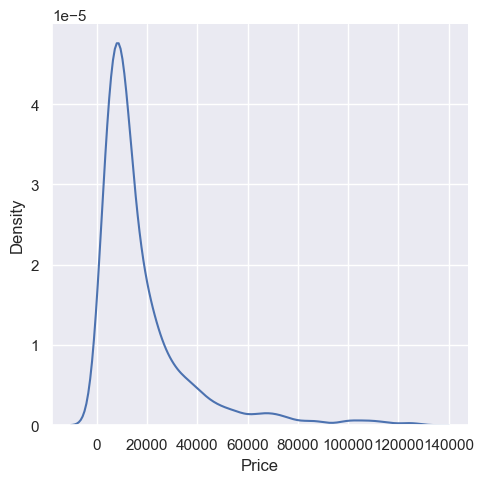

In [355]:
sns.displot(data_1["Price"],kind="kde")

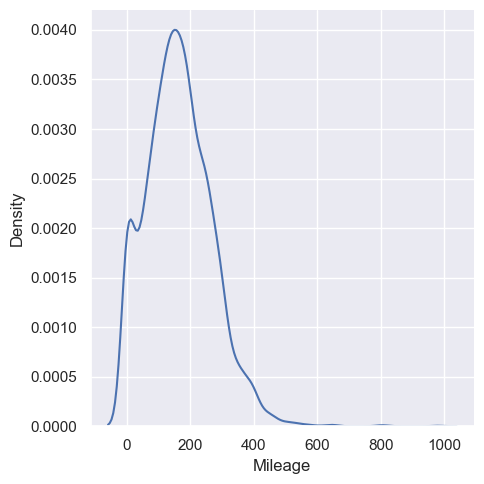

In [356]:
sns.displot(data_1["Mileage"],kind="kde")

In [357]:
q=data_1["Mileage"].quantile(0.99)
data_2=data_1[data_1["Mileage"]<q]

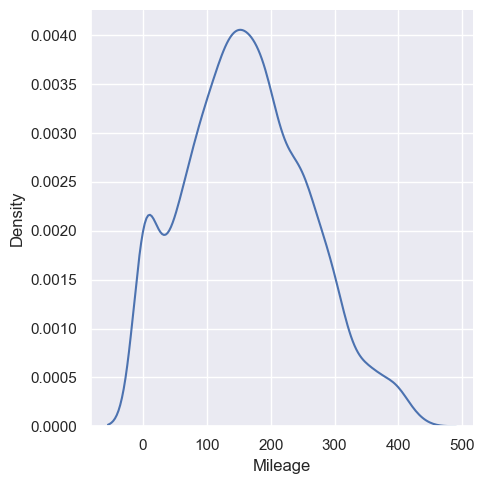

In [358]:
sns.displot(data_2["Mileage"],kind="kde")

In engine volume we can see 99.99 those are not true
One of the common way to label missing data is 99.99

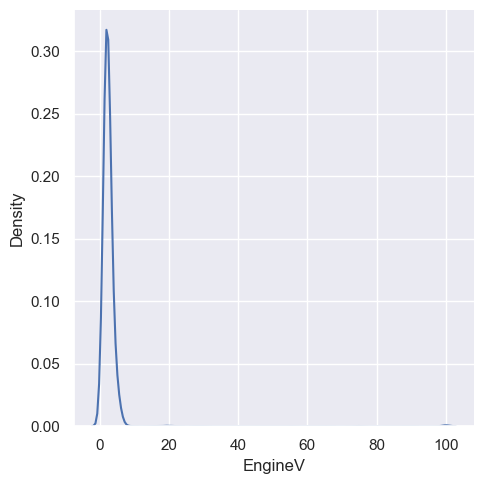

In [359]:
sns.displot(data_2["EngineV"],kind="kde")

Engine Volume will always be lower than 6.5

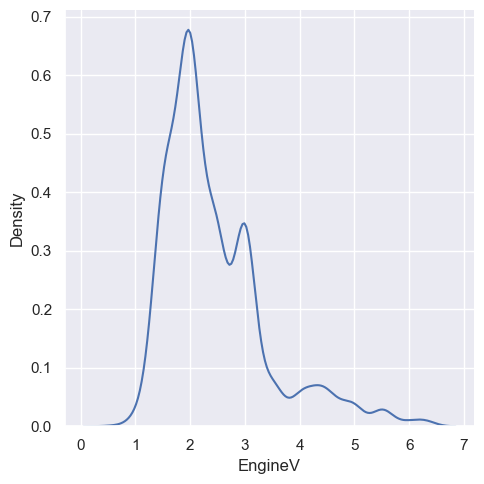

In [360]:
data_3=data_2[data_2["EngineV"]<6.5]
sns.displot(data_3["EngineV"],kind="kde")

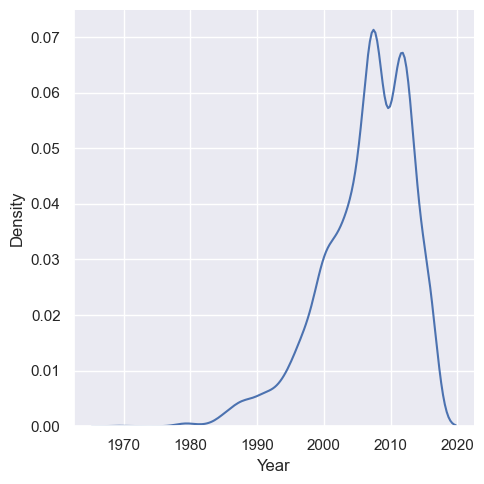

In [361]:
sns.displot(data_3["Year"],kind="kde")

Here we will remove the first percentile since there are vintage cars

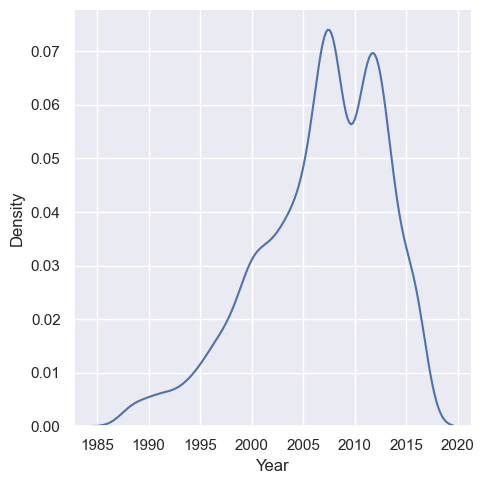

In [362]:
q=data_3["Year"].quantile(0.01)
data_4=data_3[data_3["Year"]>q]
sns.displot(data_4["Year"],kind="kde")

Now that we have successfully cleaned the data we will reset the index

In [363]:
data_cleaned=data_4.reset_index(drop=True)
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [364]:
data_cleaned.max()

Brand           Volkswagen
Price             129222.0
Body                   van
Mileage                435
EngineV                6.3
Engine Type         Petrol
Registration           yes
Year                  2016
dtype: object

In [365]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


## OLS Assumptions
### 1 . Linearity

### Price vs Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

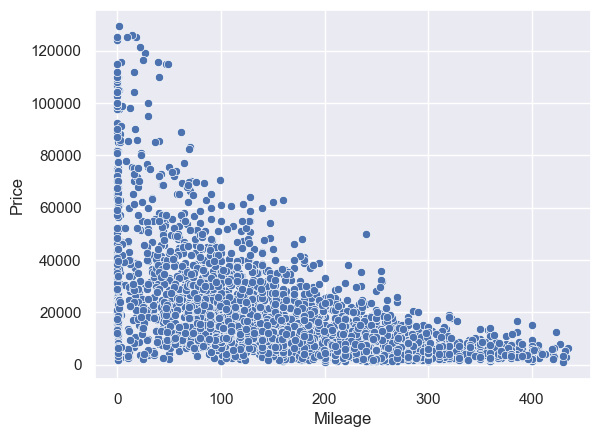

In [366]:
sns.scatterplot(x=data_cleaned["Mileage"],y=data_cleaned["Price"])

### Price vs EngineV

<AxesSubplot:xlabel='EngineV', ylabel='Price'>

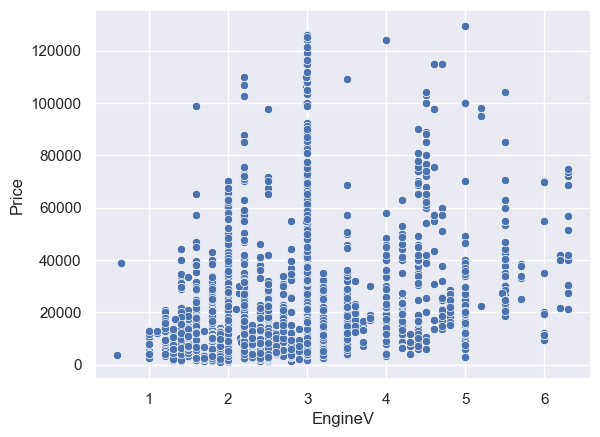

In [367]:
sns.scatterplot(x=data_cleaned["EngineV"],y=data_cleaned["Price"])

### Price vs Year

<AxesSubplot:xlabel='Year', ylabel='Price'>

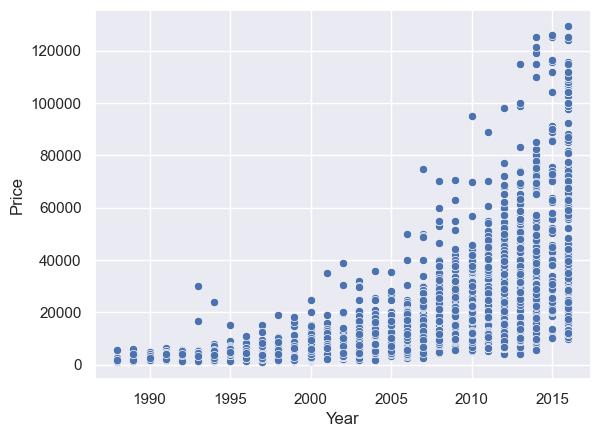

In [368]:
sns.scatterplot(x=data_cleaned["Year"],y=data_cleaned["Price"])

These relations are not linear ones
We saw price itself is not normally distributed ( kind of like logistic dist )
we should transform one or more variable
Log Transformation is useful when we have exponentially distributed values

C:\Users\Magesh\AppData\Local\Temp\ipykernel_8080\4191673015.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned["Price"])


<AxesSubplot:xlabel='Price', ylabel='Density'>

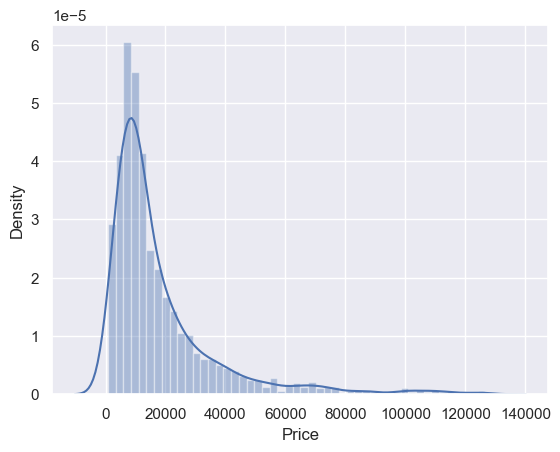

In [369]:
sns.distplot(data_cleaned["Price"])

### Log Transformation

C:\Users\Magesh\AppData\Local\Temp\ipykernel_8080\1436082353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned["log_price"])


<AxesSubplot:xlabel='log_price', ylabel='Density'>

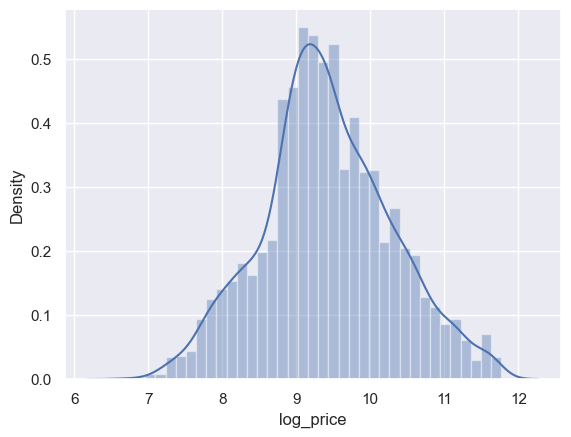

In [370]:
log_price=np.log(data_cleaned["Price"])
data_cleaned["log_price"]=log_price
sns.distplot(data_cleaned["log_price"])

### After log transformation

<AxesSubplot:xlabel='Mileage', ylabel='log_price'>

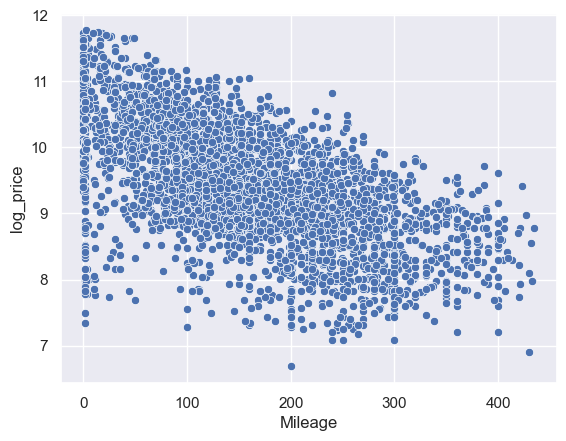

In [371]:
sns.scatterplot(x=data_cleaned["Mileage"],y=data_cleaned["log_price"])

<AxesSubplot:xlabel='EngineV', ylabel='log_price'>

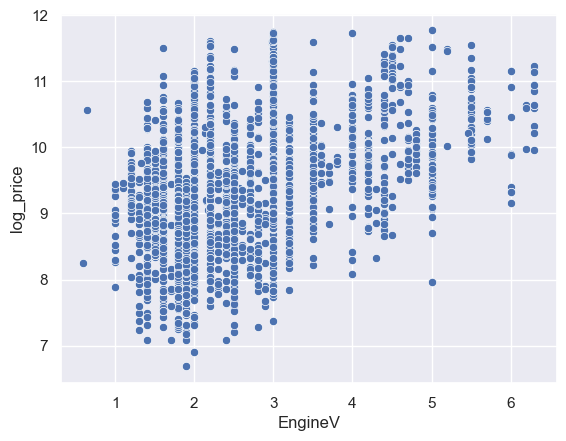

In [372]:
sns.scatterplot(x=data_cleaned["EngineV"],y=data_cleaned["log_price"])

<AxesSubplot:xlabel='Year', ylabel='log_price'>

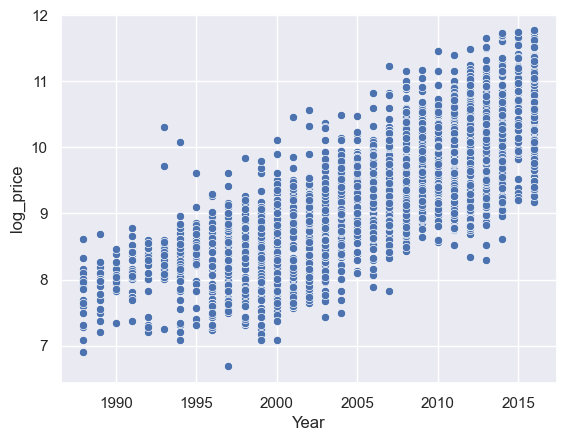

In [373]:
sns.scatterplot(x=data_cleaned["Year"],y=data_cleaned["log_price"])

We can definitely see a linear relation in all the scatterplots

In [374]:
data_cleaned=data_cleaned.drop("Price",axis=1)   # No longer need the original price

2 . Endogenity we will see later

3rd Assumption
a ) Normality is assumed in large dataset and it can also be obtained by CLT
b ) zero mean can be achieved by intercept
c ) Homoscedaticity is already achieved because we did log transformation

4.No AutoCorrelation
we dont have to check it because the data we have is not time series data

## 5 . No Multicollinearity
it is possible because year and mileage maybe related and etc
we can use VIF to check

In [375]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

### VIF

In [376]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[["Mileage","EngineV","Year"]]  ## Only these variables we are considering
vif=pd.DataFrame()
vif["Features"]=variables.columns
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif

,Features,VIF
0,Mileage,3.791584
1,EngineV,7.662068
2,Year,10.354854


VIF = 1 ( No Multicollinearity )
1< VIF <5 = Perfectly Okay
5 or 10 < VIF = Unacceptable

Removing 'Year'

In [377]:
data_no_mc=data_cleaned.drop(["Year"],axis=1)

In [378]:
variables=data_no_mc[["Mileage","EngineV"]]  ## Only these variables we are considering
vif_new=pd.DataFrame()
vif_new["Features"]=variables.columns
vif_new["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif_new

,Features,VIF
0,Mileage,2.805214
1,EngineV,2.805214


Multicollinearity Removed

## Creating Dummies
Now that we have successfully processed and selected numerical data
we can work on categorical data

If there are N features there will be N-1 Dummies

In [379]:
data_dummies=pd.get_dummies(data_no_mc,drop_first=True)
data_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [380]:
print(data_dummies.columns.values)

['Mileage' 'EngineV' 'log_price' 'Brand_BMW' 'Brand_Mercedes-Benz'
 'Brand_Mitsubishi' 'Brand_Renault' 'Brand_Toyota' 'Brand_Volkswagen'
 'Body_hatch' 'Body_other' 'Body_sedan' 'Body_vagon' 'Body_van'
 'Engine Type_Gas' 'Engine Type_Other' 'Engine Type_Petrol'
 'Registration_yes']


In [381]:
cols=[ 'log_price','Mileage' ,'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
      'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
      'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
      'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
      'Registration_yes']
data_preprocessed=data_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression

### Split into target and features

In [382]:
target=data_preprocessed["log_price"]
inputs=data_preprocessed.drop(["log_price"],axis=1)

### Scale the data

In [383]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [384]:
input_scaled=scaler.transform(inputs)

It is not usually recommended to scale the dummy variable but it can be allowed
Once scaled it will loose the dummy meaning

### Train Test Split

In [385]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,random_state=365,test_size=0.2)

## Creating Regression

In [386]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### Plot Predicted value vs Observed value

In [387]:
y_hat=reg.predict(x_train)

(6.0, 13.0)

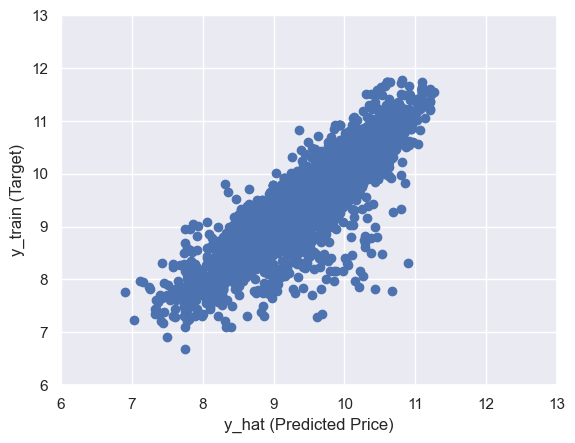

In [388]:
plt.scatter(y_hat,y_train)
plt.xlabel("y_hat (Predicted Price)")
plt.ylabel("y_train (Target)")
plt.xlim(6,13)
plt.ylim(6,13)

### Residual Graph
Residual ( Error ) = Actual value - Predicted value

C:\Users\Magesh\AppData\Local\Temp\ipykernel_8080\2229514258.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_hat)


Text(0.5, 1.0, 'Error Graph')

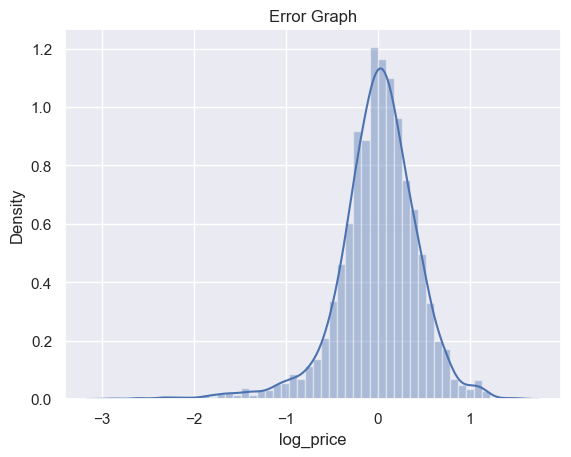

In [389]:
sns.distplot(y_train-y_hat)
plt.title("Error Graph")

From 3 rd Assumption
a) Error is normally distributed
b) Zero mean
Outlier -> Negative ( OverEstimate the target )
Outlier -> Positive ( UnderEstimate the target )

In [390]:
reg.score(x_train,y_train)

0.744996578792662

### Finding weights and bias

In [391]:
reg.intercept_  # Bias

9.304582140750979

In [392]:
print(reg.coef_) # Weights

[-0.00469263  0.220212    0.03873566  0.0324979  -0.52381377 -0.57111309
 -0.18076831 -0.2173311  -0.5882892  -0.34486661 -0.41347478 -0.44050048
 -0.46254013 -0.34320264 -0.21126668 -0.30601747  1.1001902 ]


### Summary Table

In [393]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=["Features"])
reg_summary["Weights"]=reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.004693
1,EngineV,0.220212
2,Brand_BMW,0.038736
3,Brand_Mercedes-Benz,0.032498
4,Brand_Mitsubishi,-0.523814
5,Brand_Renault,-0.571113
6,Brand_Toyota,-0.180768
7,Brand_Volkswagen,-0.217331
8,Body_hatch,-0.588289
9,Body_other,-0.344867


For numerical variables
Weight -> Positive means( Feature increases 'log_price' also increases )
Weight -> Negative means( Feature increases 'log_price' decreases )

### Benchmark for dummies

In [394]:
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Here 'Audi' is dropped so 'Audi' is the benchmark
when all other brand weight is 0 then 'Audi' is one
if weight(Brand) = Positive
then log_price(Brand) > log_price('Audi')
else if weight(Brand) = Negative
then log_price(Brand) < log_price('Audi')

Dummies are compared with their respective Benchmark only

In [395]:
print(data_cleaned["Body"].unique())

['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']


'crossover' is the Benchmark

In [405]:
print(data_cleaned["Engine Type"].unique())

['Petrol' 'Diesel' 'Gas' 'Other']


'Diesel' is the Benchmark

## Prediction

In [407]:
y_hat_test=reg.predict(x_test)

(6.0, 13.0)

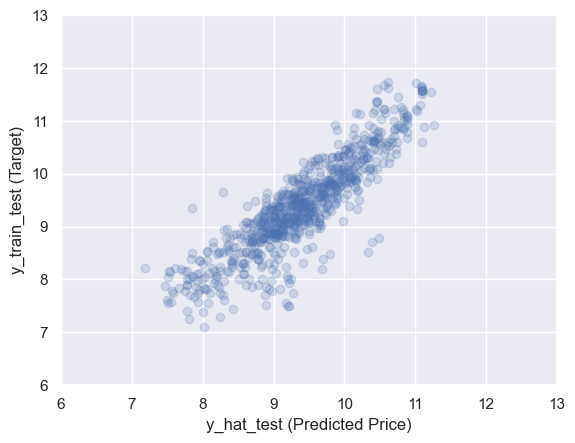

In [408]:
plt.scatter(y_hat_test,y_test,alpha=0.2)
plt.xlabel("y_hat_test (Predicted Price)")
plt.ylabel("y_train_test (Target)")
plt.xlim(6,13)
plt.ylim(6,13)

In [413]:
result=pd.DataFrame(data=np.exp(y_hat_test),columns=["Predictions"])
result

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
...,...
769,29651.726363
770,10732.071179
771,13922.446953
772,27487.751303


Because we have log() the price now we have to exp()

In [414]:
result["Target"]=y_test
result

,Predictions,Target
0,10685.501696,NaN
1,3499.255242,8.974618
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,8.846497
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


NaN occurs because when splitting the dataset from train and test original indices were preserved
We have to remove that

In [417]:
y_test=y_test.reset_index(drop=True)

In [419]:
result["Target"]=np.exp(y_test)
result

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [424]:
result["Residual"]=result["Target"]-result["Predictions"]
result["Difference%"]=np.absolute(result["Residual"]/result["Target"]*100)
result

,Predictions,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [425]:
result.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


C:\Users\Magesh\AppData\Local\Temp\ipykernel_8080\3379949920.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result["Difference%"])


<AxesSubplot:xlabel='Difference%', ylabel='Density'>

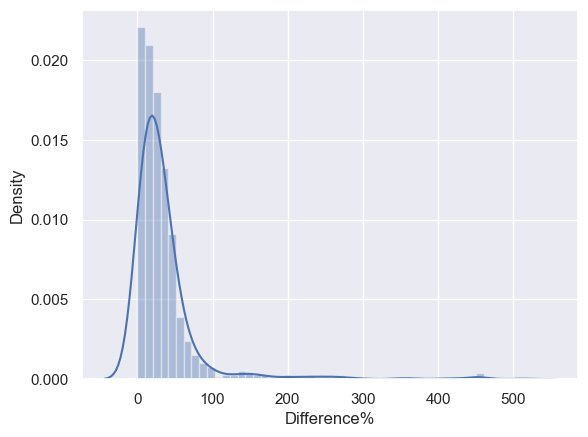

In [426]:
sns.distplot(result["Difference%"])

In [429]:
q=result["Difference%"].quantile(0.95)

100.73523308321107

In [430]:
result_new=pd.DataFrame(result[result["Difference%"]<q])
result_new

,Predictions,Target,Residual,Difference%
1,3499.255242,2800.0,-699.255242,24.973402
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
5,21289.799394,20000.0,-1289.799394,6.448997
6,20159.189144,38888.0,18728.810856,48.160900
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [431]:
result_new.describe()

,Predictions,Target,Residual,Difference%
count,735.000000,735.000000,735.000000,735.000000
mean,16140.981175,18924.552980,2783.571804,25.955234
std,13323.087928,20201.988465,10770.882984,19.526047
min,1320.562768,1400.000000,-24948.368303,0.062794
25%,7430.417162,7350.000000,-1573.822925,10.931532
50%,11770.636010,12000.000000,386.538662,21.863020
75%,20241.445102,21267.500000,3408.953035,36.846465
max,77403.055224,126000.000000,85106.162329,100.232318


The difference in prediction is maybe we forgot to include an important variable
or there is other factors that is affecting the 'price'
Developing a model includes revisiting the model a lot of times